<a href="https://colab.research.google.com/github/manaswinit26/group19/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cleansing

In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
df_test = pd.read_csv('https://raw.githubusercontent.com/aniishap/group-19/main/project_2/data/testing_data.csv')
df_train = pd.read_csv('https://raw.githubusercontent.com/aniishap/group-19/main/project_2/data/training_data.csv')

In [2]:
df_train = df_train[df_train['gender'] != 'Other'].reset_index(drop=True)

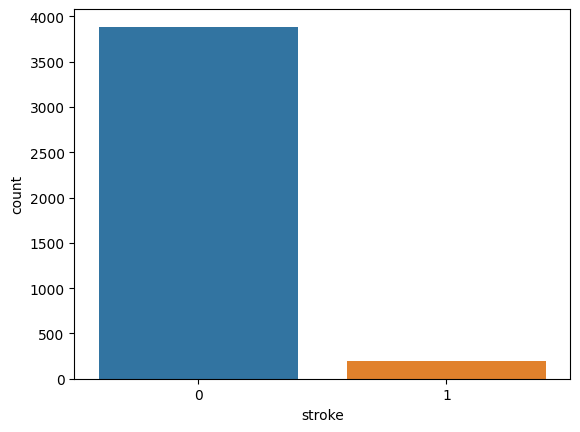

0    3887
1     199
Name: stroke, dtype: int64


In [3]:
sns.countplot(x='stroke', data=df_train)
plt.show()
stroke_counts = df_train['stroke'].value_counts()
print(stroke_counts)
# Demonstrating the total count of 'stroke' incidences in the training data

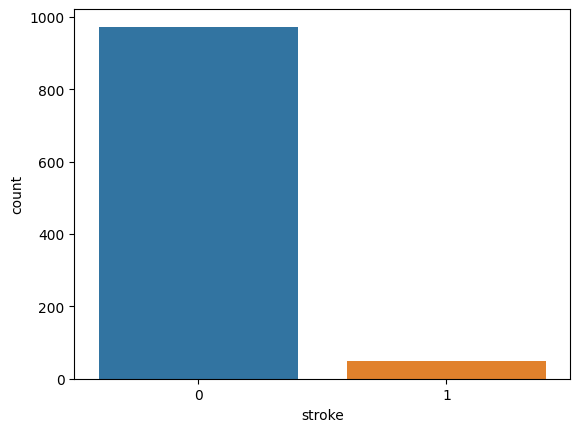

0    973
1     50
Name: stroke, dtype: int64


In [ ]:
sns.countplot(x='stroke', data=df_test)
plt.show()
stroke_counts2 = df_test['stroke'].value_counts()
print(stroke_counts2)

# Demonstrating the total count of 'stroke' incidences in the testing data

In [4]:
df_train.isnull().sum() #  bmi column has a total of 159 missing values

Unnamed: 0             0
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  159
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df_test.isnull().sum() #  bmi column has a total of 42 missing values

Unnamed: 0            0
id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  42
smoking_status        0
stroke                0
dtype: int64

In [6]:
# I am going to impute the averages of the 'bmi' column instead of dropping those rows to maintain sample size and avoid bias within the dataset

df_train['bmi']=df_train['bmi'].fillna(df_train['bmi']).mean()
df_test['bmi']=df_test['bmi'].fillna(df_test['bmi']).mean()
df_train.isnull().sum()


# There are no NAs present

Unnamed: 0           0
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
df_test.isnull().sum() # No more NA values

Unnamed: 0           0
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
# Drop 'Unnamed:0' and 'id' columns because they are not useful in our study
list=['Unnamed: 0', 'id']
df_train=df_train.drop(list,axis=1)
df_test=df_test.drop(list,axis=1)

In [9]:
unknown_count_train = (df_train['smoking_status'] == 'Unknown').sum()
print(unknown_count_train)
# Do we want to drop all 'Unknown' rows?
# There are only supposed to be 3 levels to this variable

1241


In [10]:
unknown_count_test = (df_test['smoking_status'] == 'Unknown').sum()
print(unknown_count_test)

303


In [11]:
# These are a lot of Unknown values, and it wouldn't make sense to drop all the rows.
# I think in this case, we can include 'Unknown' as a 4th category under
# 'Smoking Status'

print(df_train)


# This is a view of our cleansed dataset

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  36.0             0              0          Yes       Govt_job   
1     Female  45.0             0              0          Yes       Govt_job   
2       Male  58.0             0              0           No  Self-employed   
3     Female  61.0             0              0          Yes  Self-employed   
4     Female  78.0             0              0           No        Private   
...      ...   ...           ...            ...          ...            ...   
4081  Female  53.0             0              0          Yes       Govt_job   
4082    Male  76.0             1              0          Yes  Self-employed   
4083  Female  81.0             0              0          Yes        Private   
4084  Female  55.0             1              1          Yes        Private   
4085    Male  47.0             0              0          Yes        Private   

     Residence_type  avg_glucose_level        bmi  

# Exploratory Data Analysis/ Visualization





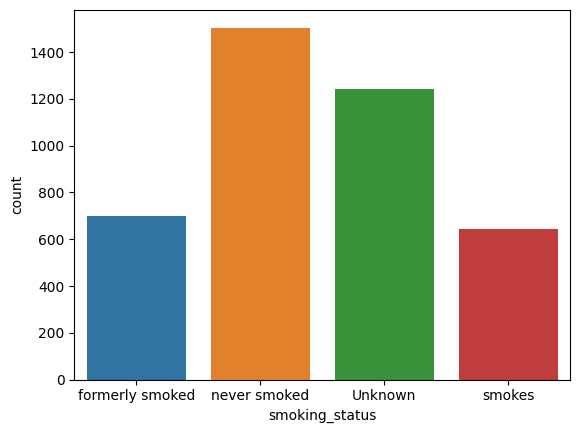

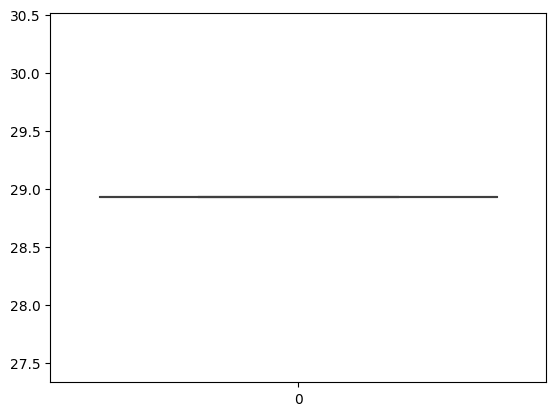

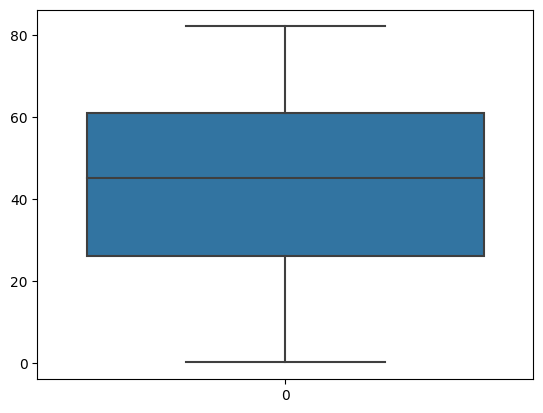

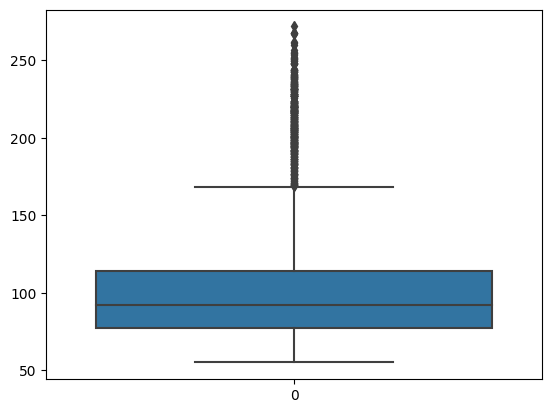

In [12]:
sns.countplot(x='smoking_status', data=df_train)
plt.show()

sns.boxplot(df_train['bmi'])
plt.show()
sns.boxplot(df_train['age'])
plt.show()

sns.boxplot(df_train['avg_glucose_level'])
plt.show()

In [ ]:
#Windsorizing to BMI and avg_glucose_level to handle of outliers

def windsorize(x):
    pct25, pct75 = np.percentile(x, [25, 75])
    iqr = pct75 - pct25
    lower_whisker = pct25 - iqr * 1.5
    upper_whisker = pct75 + iqr * 1.5
    x_windsor = x.copy()
    x_windsor[x < lower_whisker] = lower_whisker
    x_windsor[x > upper_whisker] = upper_whisker
    return x_windsor

numeric = ["age", "bmi", "avg_glucose_level"]
for i in numeric:
  df_train[i] = windsorize(df_train[i])




In [13]:
def windsorize(x):
    pct25, pct75 = np.percentile(x, [25, 75])
    iqr = pct75 - pct25
    lower_whisker = pct25 - iqr * 1.5
    upper_whisker = pct75 + iqr * 1.5
    x_windsor = x.copy()
    x_windsor[x < lower_whisker] = lower_whisker
    x_windsor[x > upper_whisker] = upper_whisker
    return x_windsor

numeric = ["age", "bmi", "avg_glucose_level"]
for i in numeric:
  df_test[i] = windsorize(df_test[i])

In [14]:
# Creating dummy variables
categorical_columns = ['smoking_status', 'Residence_type', 'gender', 'ever_married', 'work_type']
df_train = pd.get_dummies(df_train, columns=categorical_columns, drop_first=True)

# Check the first few rows of the updated DataFrame
print(df_train.head())


    age  hypertension  heart_disease  avg_glucose_level        bmi  stroke  \
0  36.0             0              0              65.87  28.925032       0   
1  45.0             0              0              68.66  28.925032       0   
2  58.0             0              0             170.93  28.925032       0   
3  61.0             0              0              69.88  28.925032       0   
4  78.0             0              0             103.86  28.925032       0   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                               1                            0   
1                               0                            1   
2                               0                            0   
3                               0                            1   
4                               0                            0   

   smoking_status_smokes  Residence_type_Urban  gender_Male  ever_married_Yes  \
0                      0                     1       

In [15]:
df_test = pd.get_dummies(df_test, columns=categorical_columns, drop_first=True)

# Check the first few rows of the updated DataFrame
print(df_test.head())


    age  hypertension  heart_disease  avg_glucose_level        bmi  stroke  \
0  58.0             1              0             87.960  28.772579       0   
1   8.0             0              0            110.890  28.772579       0   
2  70.0             0              0             69.040  28.772579       0   
3  47.0             0              0            172.225  28.772579       0   
4  74.0             1              0            172.225  28.772579       0   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                               0                            1   
1                               0                            0   
2                               1                            0   
3                               0                            0   
4                               0                            1   

   smoking_status_smokes  Residence_type_Urban  gender_Male  ever_married_Yes  \
0                      0                     1       

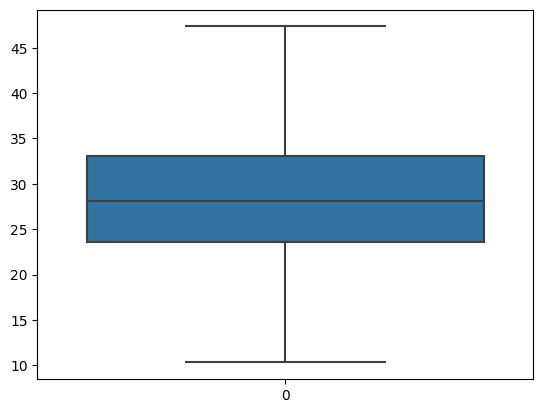

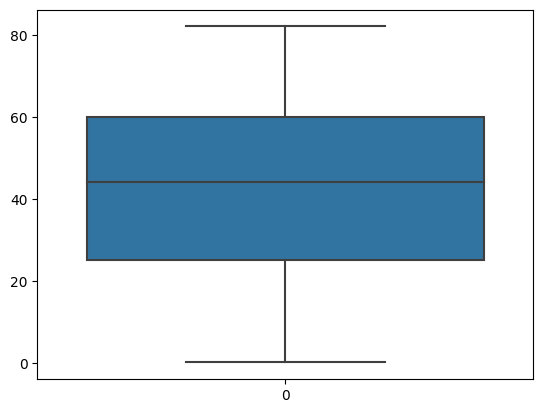

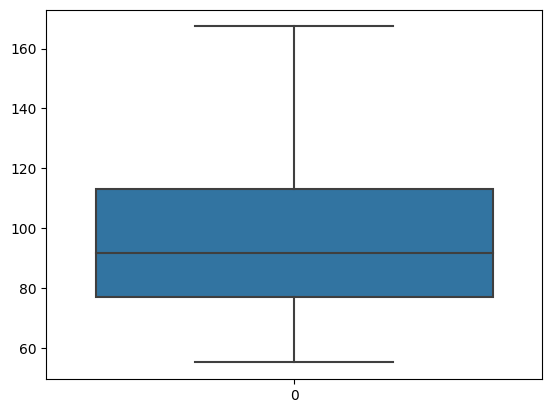

In [ ]:

#Checking
sns.boxplot(df_train['bmi'])
plt.show()
sns.boxplot(df_train['age'])
plt.show()
sns.boxplot(df_train['avg_glucose_level'])
plt.show()

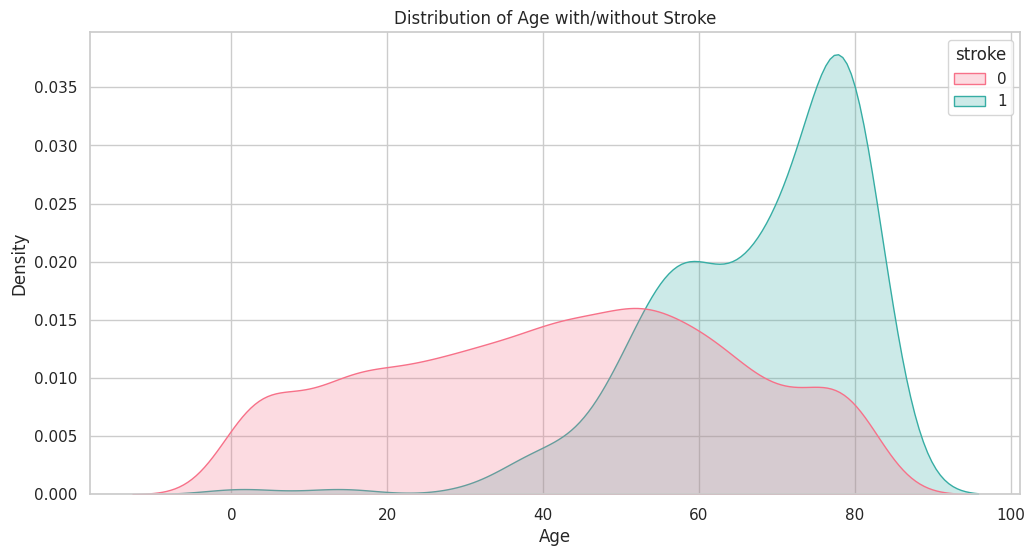

In [ ]:
# Distribution of age and stroke on training data
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.kdeplot(data=df_train, x="age", hue="stroke", fill=True, common_norm=False, palette="husl")

plt.title("Distribution of Age with/without Stroke")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

Individuals higher in age tend to have more incidents of stroke compared to no stroke. The peak age is at around 78 or 79 years of age. The likelihood of getting a stroke dramatically increases after the age of 40

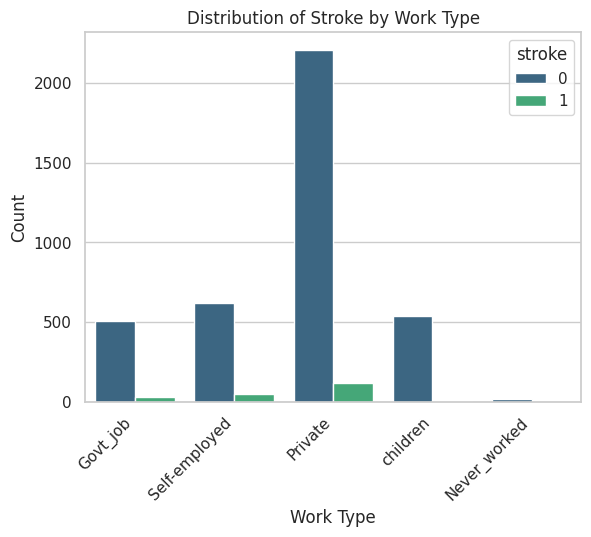

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plotting a bar plot for work_type and stroke
sns.countplot(data=df_train, x="work_type", hue="stroke", palette="viridis")

plt.title("Distribution of Stroke by Work Type")
plt.xlabel("Work Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility

plt.show()

The most documented Work Type between people who have or had not a stroke are people who work in private sector employment. These employees have the most instances of strokes, while "Never_Worked" have no instances.

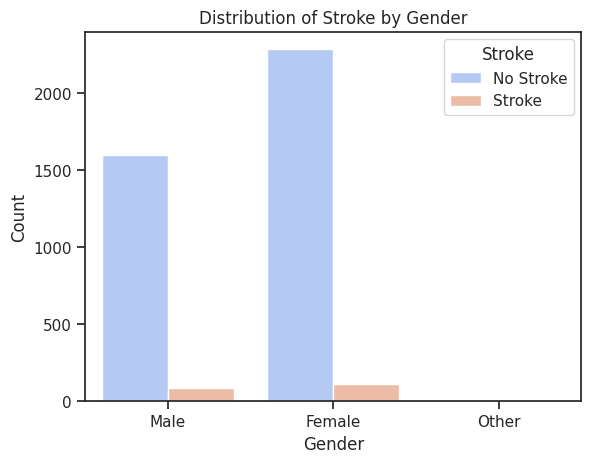

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_train, x="gender", hue="stroke", palette="coolwarm")

plt.title("Distribution of Stroke by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Stroke", labels=["No Stroke", "Stroke"])

plt.show()

In this dataset, females tend to have more strokes than men, but the difference is very minimal, and may not pose significant in understanding the relationship between gender and stroke.

<ipython-input-20-8d60b5b168c7>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_stroke = df_train.corr()['stroke'].sort_values(ascending=False)


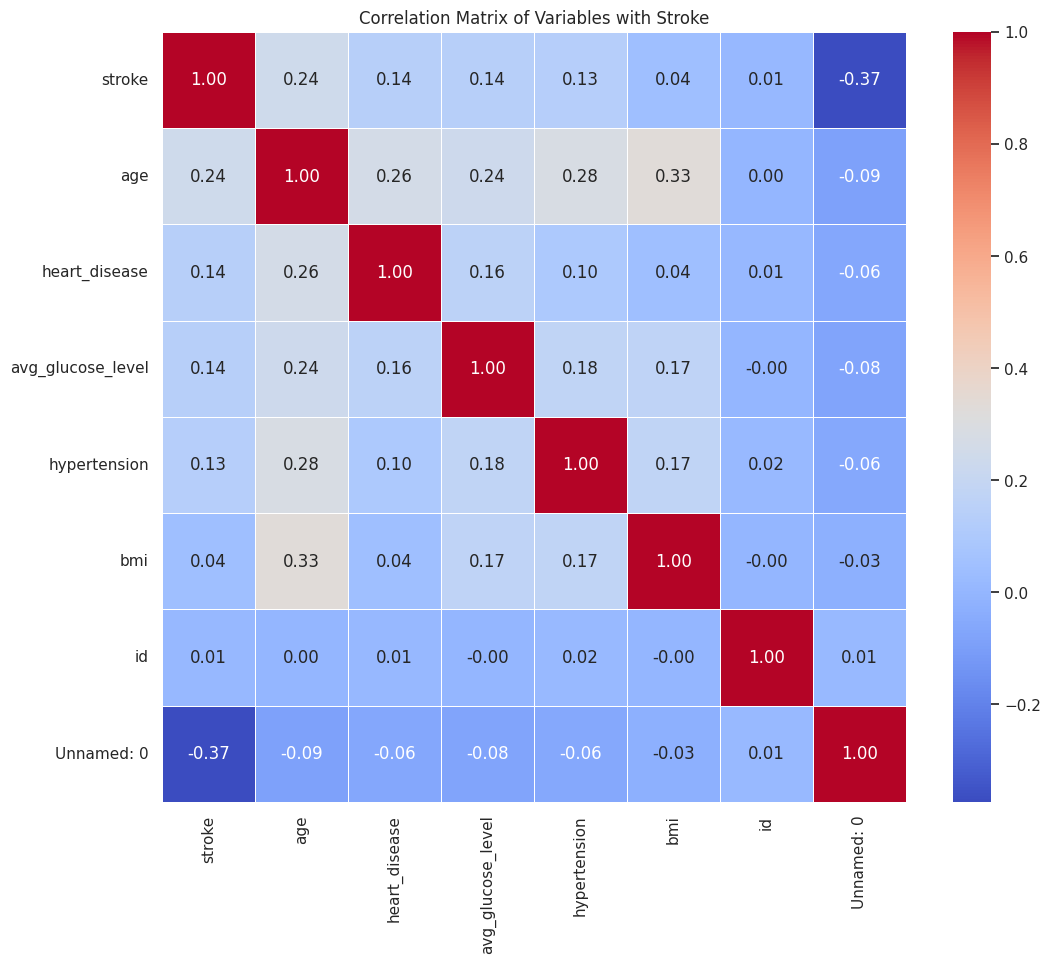

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_with_stroke = df_train.corr()['stroke'].sort_values(ascending=False)
correlation_matrix = df_train[correlation_with_stroke.index].corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

plt.title('Correlation Matrix of Variables with Stroke')

plt.show()

A lot of these variables don't appear to have strong relationships with the 'stroke' variable, because the greatest positive correlation is age = 0.24, while the greatest negative correlation is -0.37.

# Decision Tree

In [16]:
y_train = df_train['stroke']
X_train = df_train.drop('stroke',axis=1)
y_test = df_test['stroke']
X_test = df_test.drop('stroke',axis=1)

In [17]:
#Because the target variable is binary, using a Decision Tree Regressor is not not be appropriate as proven below with the negative R2 and RMSE scores instead a classification algorithm should be used.
depths = range(1, 20)
r2_scores = []
rmse_scores = []

for depth in depths:

    # Construct an appropriate matrix of regressors/features, and fit a tree to the data.
    model_tree = tree.DecisionTreeRegressor(max_depth=depth)
    cart = model_tree.fit(X_train, y_train)



    # Predict and evaluate the model compute the  𝑅2and RMSE on the test set of a variety of depths
    y_pred_tree = model_tree.predict(X_test)
    r2_tree = r2_score(y_test, y_pred_tree)
    rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
    r2_scores.append(r2_tree)
    rmse_scores.append(rmse_tree)


for i, depth in enumerate(depths):
    print(f"Depth: {depth}, R^2: {r2_scores[i]}, RMSE: {rmse_scores[i]}")





Depth: 1, R^2: 0.06852453235547418, RMSE: 0.20809013849847635
Depth: 2, R^2: 0.07934288315582705, RMSE: 0.20687820813400742
Depth: 3, R^2: 0.06961543822071636, RMSE: 0.20796824948224704
Depth: 4, R^2: 0.04670305550599352, RMSE: 0.21051346956331685
Depth: 5, R^2: 0.004480893295636945, RMSE: 0.2151248539326364
Depth: 6, R^2: -0.03657871573439686, RMSE: 0.2195163799690426
Depth: 7, R^2: -0.07452539474317366, RMSE: 0.22349825183437408
Depth: 8, R^2: -0.3043308334053214, RMSE: 0.2462406046947226
Depth: 9, R^2: -0.36273679819449467, RMSE: 0.25169337266100655
Depth: 10, R^2: -0.525378685592162, RMSE: 0.26628985758376567
Depth: 11, R^2: -0.819594989067145, RMSE: 0.29083934284141116
Depth: 12, R^2: -0.9706679640008744, RMSE: 0.3026721884328453
Depth: 13, R^2: -1.2305697217759142, RMSE: 0.32201321129438365
Depth: 14, R^2: -1.2232491358223458, RMSE: 0.32148436373218847
Depth: 15, R^2: -1.2064321902244965, RMSE: 0.320266180967971
Depth: 16, R^2: -1.129783898595409, RMSE: 0.3146542182647377
Depth: 

In [18]:


depths = range(1, 20)
accuracy_scores = []

for depth in depths:

    model_tree = tree.DecisionTreeClassifier(max_depth=depth)
    model_tree.fit(X_train, y_train)


    y_pred_tree = model_tree.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred_tree)
    accuracy_scores.append(accuracy)


    cm = confusion_matrix(y_test, y_pred_tree)


    print(f"Depth: {depth}, Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{cm}\n")



Depth: 1, Accuracy: 0.9511241446725318
Confusion Matrix:
[[973   0]
 [ 50   0]]

Depth: 2, Accuracy: 0.9511241446725318
Confusion Matrix:
[[973   0]
 [ 50   0]]

Depth: 3, Accuracy: 0.9511241446725318
Confusion Matrix:
[[973   0]
 [ 50   0]]

Depth: 4, Accuracy: 0.9511241446725318
Confusion Matrix:
[[973   0]
 [ 50   0]]

Depth: 5, Accuracy: 0.9481915933528837
Confusion Matrix:
[[970   3]
 [ 50   0]]

Depth: 6, Accuracy: 0.9491691104594331
Confusion Matrix:
[[971   2]
 [ 50   0]]

Depth: 7, Accuracy: 0.9472140762463344
Confusion Matrix:
[[968   5]
 [ 49   1]]

Depth: 8, Accuracy: 0.9354838709677419
Confusion Matrix:
[[956  17]
 [ 49   1]]

Depth: 9, Accuracy: 0.9325513196480938
Confusion Matrix:
[[952  21]
 [ 48   2]]

Depth: 10, Accuracy: 0.9325513196480938
Confusion Matrix:
[[951  22]
 [ 47   3]]

Depth: 11, Accuracy: 0.9130009775171065
Confusion Matrix:
[[931  42]
 [ 47   3]]

Depth: 12, Accuracy: 0.9051808406647116
Confusion Matrix:
[[922  51]
 [ 46   4]]

Depth: 13, Accuracy: 0.90

[Text(0.5, 0.9166666666666666, 'age <= 67.5\ngini = 0.093\nsamples = 4086\nvalue = [3887, 199]\nclass = 1'),
 Text(0.25, 0.75, 'age <= 48.5\ngini = 0.046\nsamples = 3402\nvalue = [3322, 80]\nclass = 1'),
 Text(0.125, 0.5833333333333334, 'age <= 37.5\ngini = 0.012\nsamples = 2256\nvalue = [2242, 14]\nclass = 1'),
 Text(0.0625, 0.4166666666666667, 'avg_glucose_level <= 57.935\ngini = 0.004\nsamples = 1608\nvalue = [1605, 3]\nclass = 1'),
 Text(0.03125, 0.25, 'avg_glucose_level <= 57.925\ngini = 0.049\nsamples = 40\nvalue = [39, 1]\nclass = 1'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.0\nsamples = 39\nvalue = [39, 0]\nclass = 1'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 2'),
 Text(0.09375, 0.25, 'age <= 1.36\ngini = 0.003\nsamples = 1568\nvalue = [1566, 2]\nclass = 1'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.035\nsamples = 56\nvalue = [55, 1]\nclass = 1'),
 Text(0.109375, 0.08333333333333333, 'gini = 0.001\nsamples = 1512\nvalu

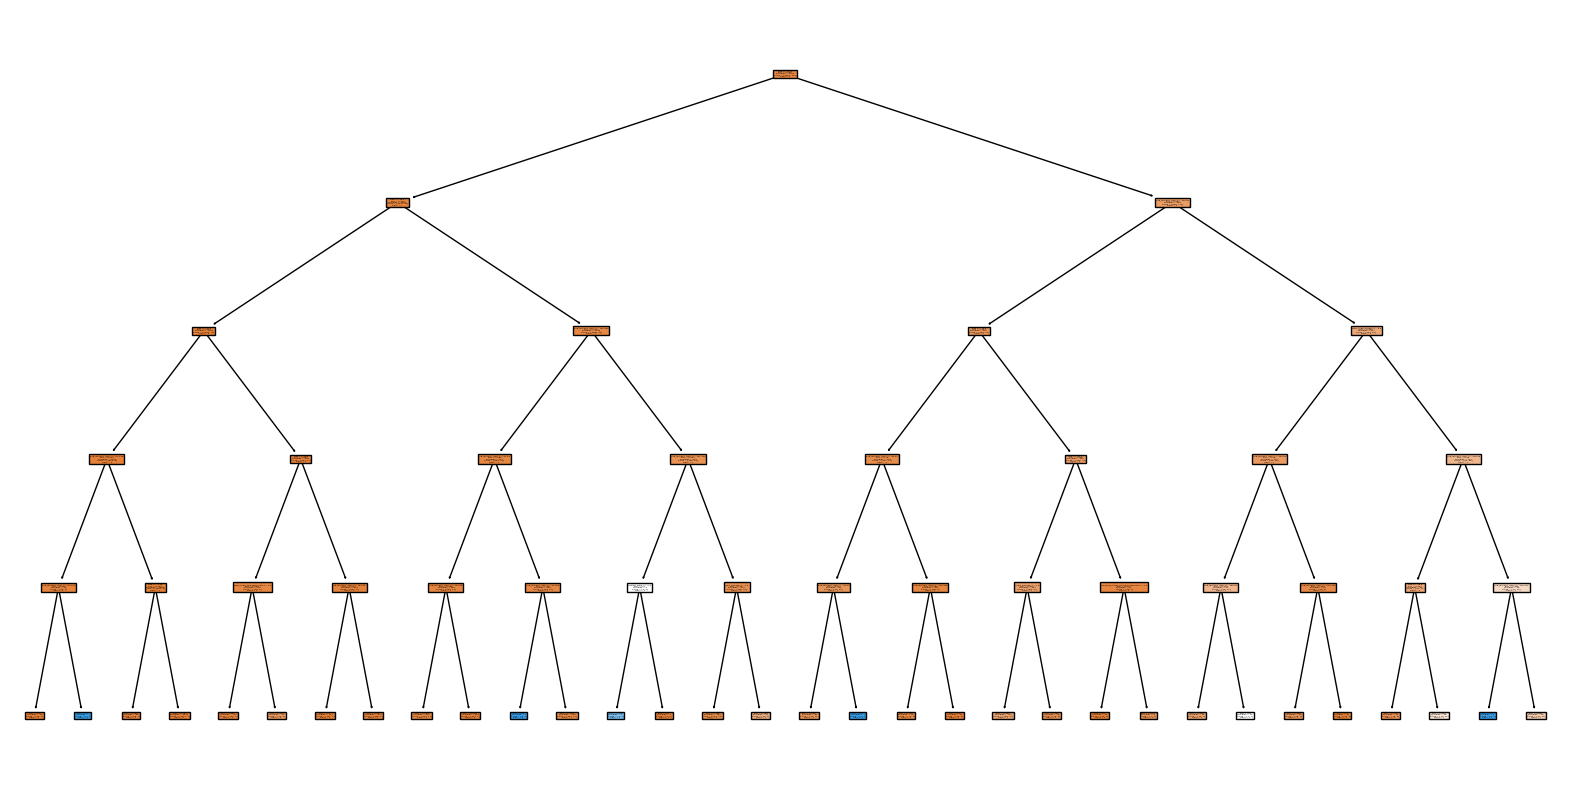

In [19]:
classifier = tree.DecisionTreeClassifier(random_state=42, max_depth=5)
classifier.fit(X_train, y_train)

# Predictions from the classification tree
y_pred=classifier.predict(X_test)

# Visualize results:
plt.figure(figsize=(20,10))
tree.plot_tree(classifier ,filled=True,feature_names=X_train.columns, class_names=["1","2"])

In [21]:
# Compute confusion matrix
tab = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
acc = (tab.iloc[0, 0] + tab.get(1, {}).get(1, 0)) / tab.to_numpy().sum()
print(acc)
print(tab)
accuracy_method_1 = tab.iloc[0, 0] / tab.iloc[0].sum() if 0 in tab else 0
accuracy_method_2 = tab.get(1, {}).get(1, 0) / tab.iloc[1].sum() if 1 in tab else 0


0.9481915933528837
Predicted    0  1
Actual           
0          970  3
1           50  0


If an individual's age is less than or equal to 70.5 years and their average glucose level is less than or equal to 64.575, and they do not have heart disease, then they are most likely to be classified as class 1.
An individual with a bmi less than or equal to 24.9, regardless of age, would also be classified as class 1.
The tree suggests that age is the most significant feature, followed by average glucose level, heart disease, and bmi.
The accuracy reported below the tree indicates that the Decision Tree Classifier was able to correctly predict the absence of stroke (class 0) in 188 cases out of 197, but it did not correctly predict any instances of stroke (class 1), as indicated by the 7 false negatives and 0 true positives in the confusion matrix. The accuracy is high primarily because of a large number of true negatives (correctly predicted no stroke cases), which can be misleading if the dataset is imbalanced with many more no stroke cases than stroke cases.

LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
# Bit of data cleaning before I proceed
dfTr = df_train
dfTe = df_test
# First I'll just do numerical values
numerics = ['age','avg_glucose_level','bmi']
X_num = dfTr.loc[:,numerics]
y = dfTr['stroke']
reg = LinearRegression().fit(X_num,y)
print(reg.score(X_num, y)) # R-squared: ~0.0620
X_num_test = dfTe.loc[:,numerics]
X_num_predict = reg.predict(X_num_test)
y_test = dfTe['stroke']
from sklearn.metrics import mean_squared_error as mse
import math
print(math.sqrt(mse(y_test, X_num_predict))) # RMSE: 0.187

0.06197431847858992
0.1870434956755676


The linear regression above is applied to predict the 'stroke' variable based on selected numerical features from the dataset. The features considered are 'age,' 'avg_glucose_level,' and 'bmi'. A value of 0.0620 for the R-squared value indicates that the linear regression model explains only about 6.2% of the variability in the dependent variable (‘stroke’). In other words, the independent variables ('age', 'avg_glucose_level', 'bmi') used in our model account for a relatively small proportion of the total variance in the dependent variable. The RMSE value of 0.187 indicates that, on average, our linear regression model’s predictions deviate from the true values by approximately 0.187 units. The RMSE of 0.187 being relatively low, indicates that the model has a good level of accuracy in capturing the underlying patterns in the data.